In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = 'Nutrient_recommendation.csv'
df = pd.read_csv(data, header=None)

In [3]:

df.shape

(2201, 7)

In [4]:
df.head()

,0,1,2,3,4,5,6
0,Crop,Temperature,Humidity,Rainfall,Label_N,Label_P,Label_K
1,rice,20.87974371,82.00274423,202.9355362,90,42,43
2,rice,21.77046169,80.31964408,226.6555374,85,58,41
3,rice,23.00445915,82.3207629,263.9642476,60,55,44
4,rice,26.49109635,80.15836264,242.8640342,74,35,40


In [5]:
df.columns = ['Crop', 'Temperature', 'Humidity', 'Rainfall', 'Label_N', 'Label_P', 'Label_K']
df.drop(df.index[:1], inplace=True)
df.head()

,Crop,Temperature,Humidity,Rainfall,Label_N,Label_P,Label_K
1,rice,20.87974371,82.00274423,202.9355362,90,42,43
2,rice,21.77046169,80.31964408,226.6555374,85,58,41
3,rice,23.00445915,82.3207629,263.9642476,60,55,44
4,rice,26.49109635,80.15836264,242.8640342,74,35,40
5,rice,20.13017482,81.60487287,262.7173405,78,42,42


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 1 to 2200
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Crop         2200 non-null   object
 1   Temperature  2200 non-null   object
 2   Humidity     2200 non-null   object
 3   Rainfall     2200 non-null   object
 4   Label_N      2200 non-null   object
 5   Label_P      2200 non-null   object
 6   Label_K      2200 non-null   object
dtypes: object(7)
memory usage: 120.4+ KB


In [7]:
df.isnull().sum()

Crop           0
Temperature    0
Humidity       0
Rainfall       0
Label_N        0
Label_P        0
Label_K        0
dtype: int64

In [8]:
X = df.drop(['Label_N', 'Label_P', 'Label_K'], axis=1)

y1 = df['Label_N']
y2 = df['Label_P']
y3 = df['Label_K']

## using random forest

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size = 0.20, random_state = 42)

In [10]:
X_train.shape, X_test.shape

((1760, 4), (440, 4))

In [11]:
X_train.head()

,Crop,Temperature,Humidity,Rainfall
1657,orange,16.39624284,92.18151927,102.944161
753,blackgram,27.54384835,69.3478631,69.40878198
893,lentil,27.52185591,63.13215259,45.20841071
1042,banana,25.36059237,75.03193255,116.5531455
1180,mango,35.47478322,47.97230503,97.79072474


In [12]:
mapping = dict()

with open("mapped_crops.csv", "w") as fh:
    fh.write("Crops,Key\n")
    for i, crop in enumerate(np.unique(df[['Crop']]), 1):
        mapping[crop] =  i
        fh.write("%s,%d\n" % (crop, i))
    mapping['NA'] = np.nan
    fh.write("NA,nan")
    
print(mapping)

{'apple': 1, 'banana': 2, 'blackgram': 3, 'chickpea': 4, 'coconut': 5, 'coffee': 6, 'cotton': 7, 'grapes': 8, 'jute': 9, 'kidneybeans': 10, 'lentil': 11, 'maize': 12, 'mango': 13, 'mothbeans': 14, 'mungbean': 15, 'muskmelon': 16, 'orange': 17, 'papaya': 18, 'pigeonpeas': 19, 'pomegranate': 20, 'rice': 21, 'watermelon': 22, 'NA': nan}


In [13]:
import category_encoders as ce

ordinal_cols_mapping = [{"col": "Crop", "mapping": mapping}, ]

encoder = ce.OrdinalEncoder(cols = 'Crop', mapping = ordinal_cols_mapping, return_df = True)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()

,Crop,Temperature,Humidity,Rainfall
1657,17,16.39624284,92.18151927,102.944161
753,3,27.54384835,69.3478631,69.40878198
893,11,27.52185591,63.13215259,45.20841071
1042,2,25.36059237,75.03193255,116.5531455
1180,13,35.47478322,47.97230503,97.79072474


In [14]:
from sklearn.ensemble import RandomForestRegressor
 
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(X_train, y_train)
query = [mapping['apple'], 42.0, 27, 2.2]
y_pred = regressor.predict([query])
print(y_pred[0])

130.28


c:\Users\smart pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [16]:
# from sklearn import metrics

# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# rmse = float(format(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), '.3f'))
# print("\nRMSE: ", rmse)

In [17]:
model  =RandomForestRegressor(n_jobs=-1)

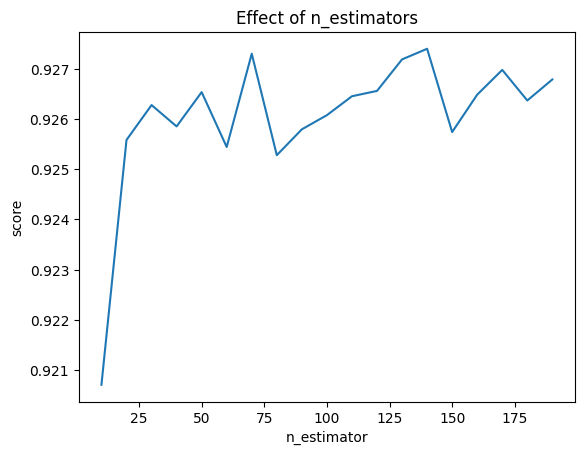

In [18]:
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

## using knn model


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)


In [21]:
import category_encoders as ce

ordinal_cols_mapping = [{"col": "Crop", "mapping": mapping}, ]

encoder = ce.OrdinalEncoder(cols = 'Crop', mapping = ordinal_cols_mapping, return_df = True)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train.head()

,Crop,Temperature,Humidity,Rainfall
1657,17,16.39624284,92.18151927,102.944161
753,3,27.54384835,69.3478631,69.40878198
893,11,27.52185591,63.13215259,45.20841071
1042,2,25.36059237,75.03193255,116.5531455
1180,13,35.47478322,47.97230503,97.79072474


In [22]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k = 21  
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         7
          12       0.33      0.33      0.33         3
         120       0.00      0.00      0.00         3
         121       0.00      0.00      0.00         3
         122       0.00      0.00      0.00         1
         123       0.10      0.33      0.15         3
         124       0.00      0.00      0.00         1
         125       0.00      0.00      0.00         0
         128       0.00      0.00      0.00         3
         129       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
         130       0.00      0.00      0.00         1
         131       0.00      0.00      0.00         1
         132       0.00      0.00      0.00         1
         134       0.00      0.00      0.00         1
         135       0.00      0.00      0.00         1
    

c:\Users\smart pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\smart pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\smart pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average

In [23]:
query = [mapping['apple'], 42.0, 27, 2.2]
y_pred = knn.predict([query])
print(y_pred[0])

48


## accuracy checker

In [24]:
scores_arr = [round(sc, 3) for sc in scores]
unique, counts = np.unique(scores_arr, return_counts = True)

max_count = max(counts)
accuracy = -1
for uni, count in zip(unique, counts):
    # print(uni, count)
    if count == max_count:
        accuracy = uni

print("Model accuracy: %.3f" % (accuracy))

Model accuracy: 0.926
